In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.diagnostic import lilliefors
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf

## Base de dados ##

In [2]:
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(
    '../data/house/housing.csv', sep = ',',
    encoding = 'iso-8859-1'
)

# Exploração e tratamento dos dados #
**Atributos Previsores**

<span style="font-size: 14px;">

- RM: é o número médio de cômodos entre os imóveis no bairro. </br>

- LSTAT: é a porcentagem de proprietários no bairro considerados de "classe baixa".

- PTRATIO: é a razão entre estudantes e professores nas escolas de ensino fundamental e médio no bairro.
</span>

**Variável alvo**

- MEDV: valor médio das casas

## Analise de atributos e tipos ##

**Valores missing**

In [4]:
df.isnull().sum()

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

**Análise dos tipos de atributos**

In [5]:
df.shape

(2040, 4)

In [6]:
df.dtypes

RM         float64
LSTAT      float64
PTRATIO    float64
MEDV       float64
dtype: object

**Dados Estatísticos**

In [7]:
df.describe()

,RM,LSTAT,PTRATIO,MEDV
count,2040.000000,2040.000000,2040.000000,2.040000e+03
mean,6.346742,7.552059,17.696863,5.384817e+05
std,0.486539,5.662059,1.694193,1.506652e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,6.030750,3.740000,16.600000,4.389000e+05
50%,6.345000,4.600000,16.600000,5.250000e+05
75%,6.635000,9.597500,19.600000,6.468000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


## Análise dos outliers ##

**Número médio de cômodos por casa no bairro**

In [8]:
boxplot = px.box(df, y = "RM", width=600, height=400, boxmode='overlay', color_discrete_sequence=["hotpink"])
boxplot.show()

**Proprietários classe baixa no bairro**

In [9]:
boxplot = px.box(df, y = "LSTAT", width=600, height=400, boxmode='overlay', color_discrete_sequence=["royalblue"])
boxplot.show()

**Razão entre n. de alunos e professores no bairro**

In [10]:
boxplot = px.box(df, y = "PTRATIO", width=600, height=400, boxmode='overlay', color_discrete_sequence=["seagreen"])
boxplot.show()

**Valor médio das casas**

In [11]:
boxplot = px.box(df, y = "MEDV", width=600, height=400, boxmode='overlay', color_discrete_sequence=["blueviolet"])
boxplot.show()

## Gráficos de dispersão ##

**Número médio de cômodos por casa no bairro**

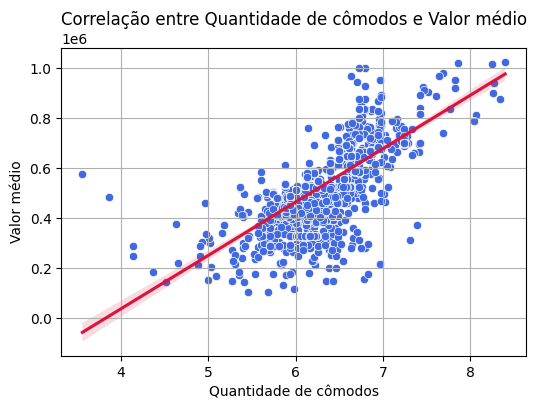

In [12]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x="RM", y="MEDV", color='royalblue')

sns.regplot(data=df, x="RM", y="MEDV", scatter=False, color='crimson')

plt.title('Correlação entre Quantidade de cômodos e Valor médio')
plt.xlabel('Quantidade de cômodos')
plt.ylabel('Valor médio')
plt.grid(True)

plt.show()

**Proprietários classe baixa no bairro**

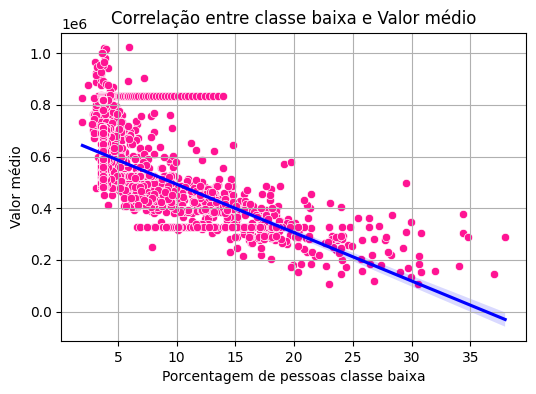

In [13]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x="LSTAT", y="MEDV", color='deeppink')

sns.regplot(data=df, x="LSTAT", y="MEDV", scatter=False, color='blue')

plt.title('Correlação entre classe baixa e Valor médio')
plt.xlabel('Porcentagem de pessoas classe baixa')
plt.ylabel('Valor médio')
plt.grid(True)
plt.show()

**Razão entre n. de alunos e professores no bairro**

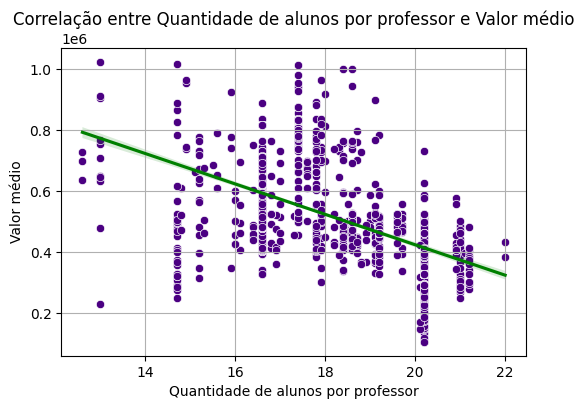

In [14]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x="PTRATIO", y="MEDV", color='indigo')

sns.regplot(data=df, x="PTRATIO", y="MEDV", scatter=False, color='green')

plt.title('Correlação entre Quantidade de alunos por professor e Valor médio')
plt.xlabel('Quantidade de alunos por professor')
plt.ylabel('Valor médio')
plt.grid(True)
plt.show()

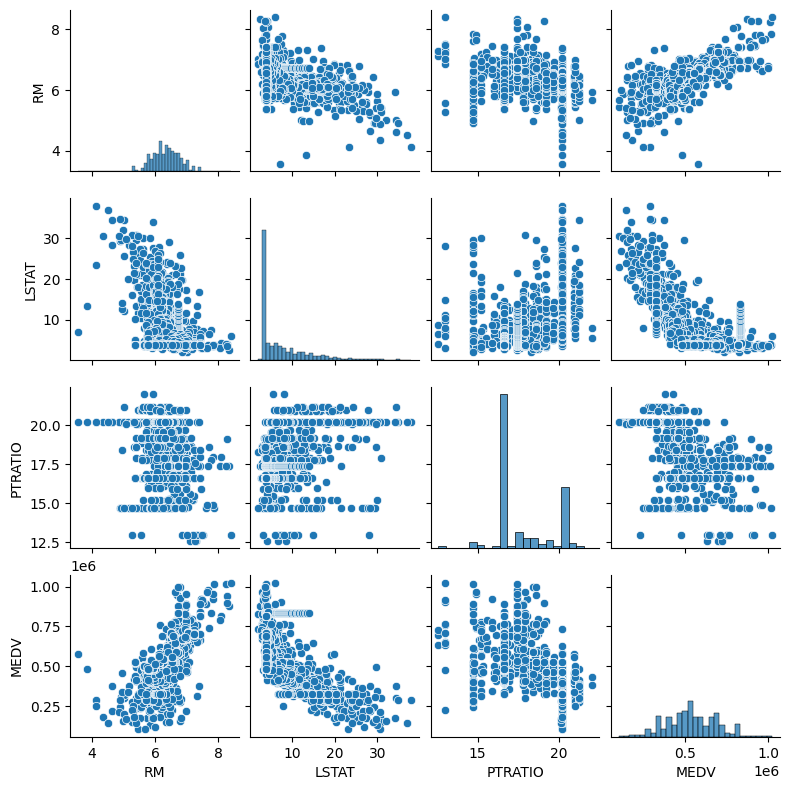

In [15]:
sns.pairplot(df, height=2);

## Análise da Normalidade ##

### Gráfico QQ-Plot ###

**Valor médio das casas no bairro**

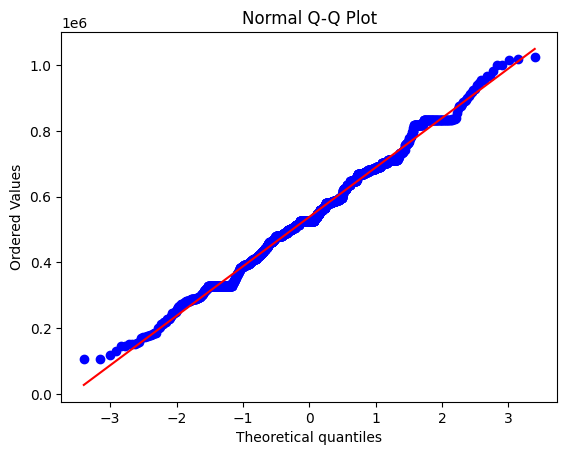

In [16]:
stats.probplot(df['MEDV'], dist = 'norm', plot = plt)
plt.title("Normal Q-Q Plot")
plt.show()

In [17]:
hist = px.histogram(df, x = "MEDV", nbins = 60)
hist.update_layout(width = 600, height = 400, title_text = "Média dos valores")
hist.show()

**Número médio de cômodos por casa**

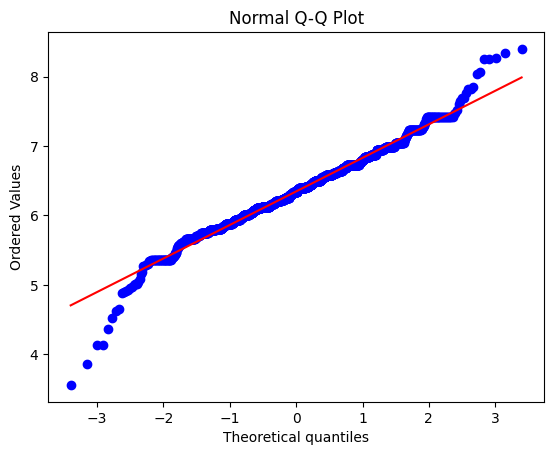

In [18]:
stats.probplot(df['RM'], dist = 'norm', plot = plt)
plt.title("Normal Q-Q Plot")
plt.show()

In [19]:
hist = px.histogram(df, x = "RM", nbins = 60)
hist.update_layout(width = 600, height = 400, title_text = "Cômodos por casa")
hist.show()

**Proprietários classe baixa no bairro**

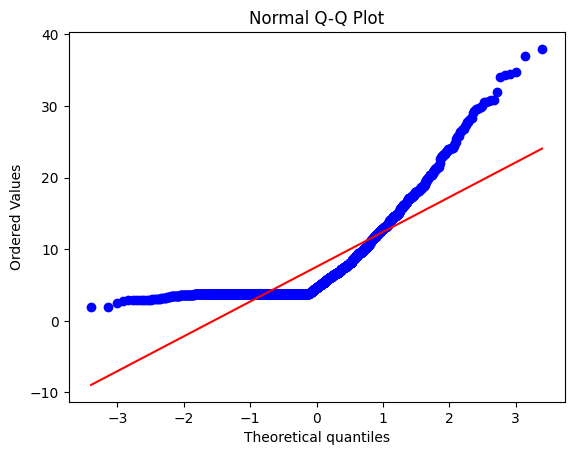

In [20]:
stats.probplot(df['LSTAT'], dist = 'norm', plot = plt)
plt.title("Normal Q-Q Plot")
plt.show()

In [21]:
hist = px.histogram(df, x = "LSTAT", nbins = 60)
hist.update_layout(width = 600, height = 400, title_text = "Porcentagem de pessoas classe baixa")
hist.show()

**Razão entre n. de alunos e professores no bairro**

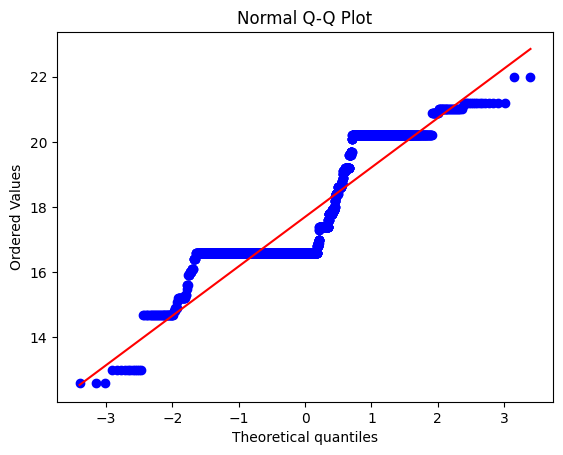

In [22]:
stats.probplot(df['PTRATIO'], dist = 'norm', plot = plt)
plt.title("Normal Q-Q Plot")
plt.show()

In [23]:
hist = px.histogram(df, x = "PTRATIO", nbins = 60)
hist.update_layout(width = 600, height = 400, title_text = "Quantidade de alunos por professor")
hist.show()

## Teste Estatístico ##
<span style="font-size: 14px;">

**HO = Distribuição normal:** p-valor > 0.05 </br></br>
**HA = Distribuição não normal:** p-valor < = 0.05
</span>


**MEDV**

In [24]:
estatistica, p = stats.shapiro(df.MEDV)
print("Estatística do teste: {:.4f}".format(estatistica))
print("p-valor: {:.4e}".format(p))

Estatística do teste: 0.9929
p-valor: 2.4426e-08


In [25]:
estatistica, p = lilliefors(df.MEDV, dist = 'norm')
print("Estatística do teste: {:.4f}".format(estatistica))
print("p-valor: {:.4e}".format(p))

Estatística do teste: 0.0587
p-valor: 1.0000e-03


**RM**

In [26]:
estatistica, p = stats.shapiro(df.RM)
print("Estatística do teste: {:.4f}".format(estatistica))
print("p-valor: {:.4e}".format(p))

Estatística do teste: 0.9832
p-valor: 9.1086e-15


In [27]:
estatistica, p = lilliefors(df.RM, dist = 'norm')
print("Estatística do teste: {:.4f}".format(estatistica))
print("p-valor: {:.4e}".format(p))

Estatística do teste: 0.0436
p-valor: 1.0000e-03


**LSTAT**

In [28]:
estatistica, p = stats.shapiro(df.LSTAT)
print("Estatística do teste: {:.4f}".format(estatistica))
print("p-valor: {:.4e}".format(p))

Estatística do teste: 0.7334
p-valor: 3.2744e-49


In [29]:
estatistica, p = lilliefors(df.LSTAT, dist = 'norm')
print("Estatística do teste: {:.4f}".format(estatistica))
print("p-valor: {:.4e}".format(p))

Estatística do teste: 0.2235
p-valor: 1.0000e-03


**PTRATIO**

In [30]:
estatistica, p = stats.shapiro(df.PTRATIO)
print("Estatística do teste: {:.4f}".format(estatistica))
print("p-valor: {:.4e}".format(p))

Estatística do teste: 0.8002
p-valor: 1.2662e-44


In [31]:
estatistica, p = lilliefors(df.PTRATIO, dist = 'norm')
print("Estatística do teste: {:.4f}".format(estatistica))
print("p-valor: {:.4e}".format(p))

Estatística do teste: 0.3139
p-valor: 1.0000e-03


## Correlação Linear ##

<span style="font-size: 13px;">
<li><strong>Coeficiente de Pearson </strong> -> Distribuição normal</li> </br>
<li><strong>Coeficiente de Spearman</strong> -> Distribuição <strong>não</strong> normal</li></br>
<li><strong>Coeficiente de Kendall</strong> -> Distribuição <strong>não</strong> normal</li>
</span>

**Pearson**

In [32]:
coef, p = stats.pearsonr(df.MEDV, df.RM)
print('Coeficiente de correlação: {:.2f}'.format(coef))
print('p-valor: {:.2e}'.format(p))

Coeficiente de correlação: 0.69
p-valor: 1.04e-286


**Spearman** </br>

*Iremos usá-lo*

<span style="font-size: 13px;"> 
<li>Coeficiente de correlação: 0.73 -> Uma correlação de 0.73 é considerada moderadamente forte.</li> </br>
<li>p-valor: 0.00e+00O -> p-valor gerado é muito baixo e indica que há evidências estatisticamente significativas para rejeitar a hipótese nula de que não há correlação entre as duas variáveis. 
Em outras palavras,<strong> há uma forte correlação entre as variáveis MEDV e RM.</strong> </li>
</span>

In [33]:
coef, p = stats.spearmanr(df.MEDV, df.RM)
print('Coeficiente de correlação: {:.2f}'.format(coef))
print('p-valor: {:.2e}'.format(p))

Coeficiente de correlação: 0.73
p-valor: 0.00e+00


**Kendall**

In [34]:
coef, p = stats.kendalltau(df.MEDV, df.RM)
print('Coeficiente de correlação: {:.2f}'.format(coef))
print('p-valor: {:.2e}'.format(p))

Coeficiente de correlação: 0.53
p-valor: 8.53e-274


In [35]:
correlacoes = df.corr(method = 'spearman')
correlacoes

,RM,LSTAT,PTRATIO,MEDV
RM,1.000000,-0.325439,-0.157697,0.727600
LSTAT,-0.325439,1.000000,0.642415,-0.703269
PTRATIO,-0.157697,0.642415,1.000000,-0.508757
MEDV,0.727600,-0.703269,-0.508757,1.000000


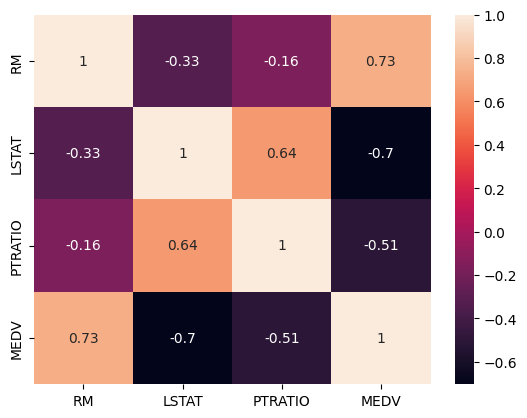

In [36]:
plt.figure()
sns.heatmap(correlacoes, annot = True);

# Regressão Linear Simples #

## Algoritmo simples ##

### Análise dos dados e separação de x e y ###

In [37]:
df.head(2)

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0


In [38]:
x1 = df.iloc[:, 0:1].values
x1

array([[6.575],
       [6.421],
       [7.185],
       ...,
       [6.678],
       [6.549],
       [5.79 ]])

In [39]:
y = df.iloc[:, 3].values
y

array([504000., 453600., 728700., ..., 588600., 558600., 481800.])

### Separação da base de treino e teste ###

In [40]:
x_train, x_test, y_train, y_test = train_test_split(
    x1, y, test_size = 0.3, random_state = 5
)

In [41]:
x_train.shape, y_train.shape

((1428, 1), (1428,))

In [42]:
x_test.shape, y_test.shape

((612, 1), (612,))

### Algoritmo da regressão linear ###

In [43]:
reg_linear = LinearRegression()
reg_linear.fit(x_train, y_train);

**Intercepto (coeficiente linear)**

In [44]:
reg_linear.intercept_

-805128.5964365043

**Coeficiente Angular**

In [45]:
reg_linear.coef_

array([211280.90032266])

#### Resultado da equação: ####
<span style="font-size: 14px; font-family: monospace;">

$ \text{Valor médio da casa} = -805128.5964365043 + 211280.90032266 \times \text{número de cômodos} $

</span>

#### Coeficiente de determinação ####
<span style="font-size: 14px;">Medida estatística que indica o quanto a variabilidade de uma variável dependente é explicada pelos valores da variável independente em um modelo de regressão. </br>
Quanto mais próximo de 1, melhor o modelo explica a variação na variável dependente.
</span>


**Coeficiente de Determinação para os dados de treino**

In [46]:
r2_train = reg_linear.score(x_train, y_train)
print("%.2f%%" % (r2_train * 100.0))

47.38%


**Coeficiente de Determinação para os dados de teste**

In [47]:
r2_test = reg_linear.score(x_test, y_test)
print("%.2f%%" % (r2_test * 100.0))

47.20%


#### Previsões ####

In [48]:
previsoes_train = reg_linear.predict(x_train)

#### Gráfico de dispersão ####

**Dados de treino**

Text(0.5, 0, 'Quantidade de cômodos')

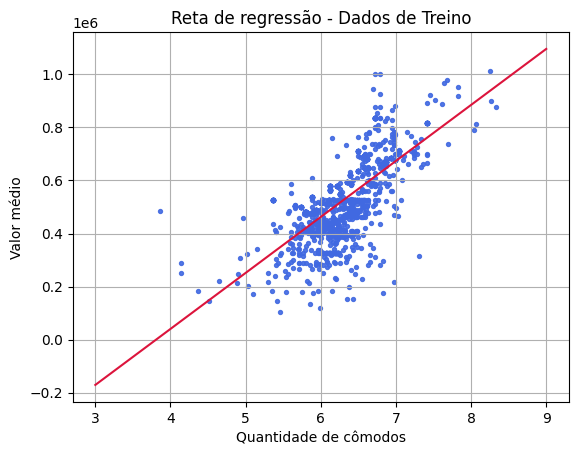

In [49]:
plt.scatter(
    y = y_train, x = x_train, color = 'royalblue',
    s = 8, alpha = 0.9
)
x_plot = np.linspace(3, 9)
plt.plot(
    x_plot,
    x_plot * reg_linear.coef_ + reg_linear.intercept_,
    color = 'crimson'
)
plt.grid(True)
plt.title('Reta de regressão - Dados de Treino')
plt.ylabel('Valor médio')
plt.xlabel('Quantidade de cômodos')

**Dados de teste**

In [50]:
previsoes_test = reg_linear.predict(x_test)

Text(0.5, 0, 'Quantidade de cômodos')

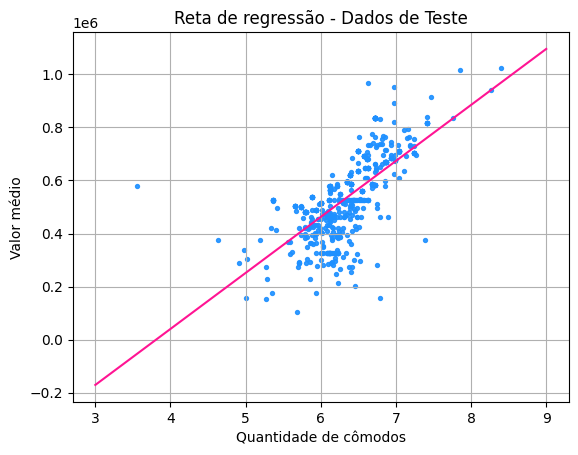

In [51]:
plt.scatter(
    y = y_test, x = x_test, color = 'dodgerblue',
    s = 8, alpha = 0.9
)
x_plot = np.linspace(3, 9)
plt.plot(
    x_plot,
    x_plot * reg_linear.coef_ + reg_linear.intercept_,
    color = 'deeppink'
)
plt.grid(True)
plt.title('Reta de regressão - Dados de Teste')
plt.ylabel('Valor médio')
plt.xlabel('Quantidade de cômodos')

In [52]:
#Fazendo previsões para valores de cômodos distintos
valor_casa = reg_linear.predict([[4]])
print('Valor da casa: US$ {:.2f}'.format(float(valor_casa)))

Valor da casa: US$ 39995.00


#### Métricas de desempenho ####

**Erro Absoluto**

In [53]:
print("Erro absoluto: {:.2f}".format(abs(y_test - previsoes_test).mean()))

Erro absoluto: 85628.24


**Erro médio Absoluto**

In [54]:
print("Erro médio absoluto: {:.2f}".format(mean_absolute_error(y_test, previsoes_test)))

Erro médio absoluto: 85628.24


**Erro quadrático médio**

In [55]:
print("Erro quadrático médio: {:.2f}".format(mean_squared_error(y_test, previsoes_test)))

Erro quadrático médio: 12561974906.16


**Raiz do erro quadrático médio**

In [56]:
print("Raiz quadrático médio: {:.2f}".format(np.sqrt(mean_squared_error(y_test, previsoes_test))))

Raiz quadrático médio: 112080.22


### Valor médio (MEDV) em função da classe social (LSTAT) ###

In [57]:
x2 = df.iloc[:, 1:2].values
x2

array([[4.98],
       [9.14],
       [4.03],
       ...,
       [3.74],
       [3.74],
       [3.74]])

In [58]:
y = df.iloc[:, 3].values
y

array([504000., 453600., 728700., ..., 588600., 558600., 481800.])

**Separação da base de treino e teste**

In [59]:
x_train, x_test, y_train, y_test = train_test_split(
    x2, y, test_size = 0.3, random_state = 10
)

In [60]:
x_train.shape, y_train.shape

((1428, 1), (1428,))

In [61]:
x_test.shape, y_test.shape

((612, 1), (612,))

**Criação do algoritmo**

In [62]:
reg_linear2 = LinearRegression()
reg_linear2.fit(x_train, y_train);

**Coeficiente linear**

In [63]:
reg_linear2.intercept_

674939.5373481169

**Coeficiente angular**

In [64]:
reg_linear2.coef_

array([-18332.64041825])

**Coeficiente de determinação dos dados de treino**

In [65]:
reg_linear2.score(x_train, y_train)

0.4882301961005785

In [66]:
previsoes_train = reg_linear2.predict(x_train)
previsoes_train

array([531394.96287319, 575759.95268537, 606375.46218385, ...,
       606375.46218385, 578143.19593974, 606375.46218385])

#### Valor da equação ####

<span style="font-size: 14px; font-family: monospace;">

$ \text{Valor médio da casa} = 674939.5373481169 - 18332.64041825 \times \text{número de cômodos} $

</span>

Text(0.5, 0, 'Quantidade proprietários de classe média baixa(%)')

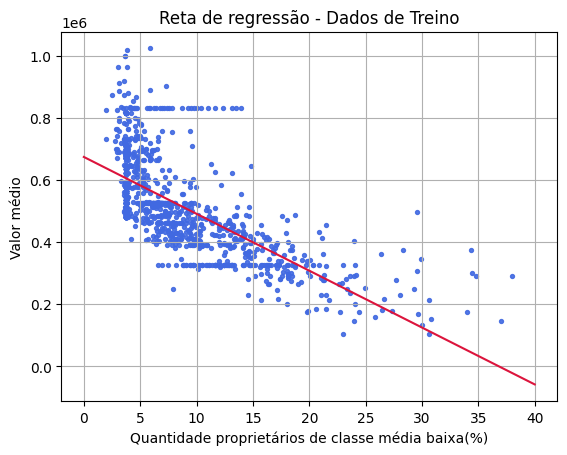

In [67]:
plt.scatter(
    y = y_train, x = x_train, color = 'royalblue',
    s = 8, alpha = 0.9
)
x_plot = np.linspace(0, 40)
plt.plot(
    x_plot,
    x_plot * reg_linear2.coef_ + reg_linear2.intercept_,
    color = 'crimson'
)
plt.grid(True)
plt.title('Reta de regressão - Dados de Treino')
plt.ylabel('Valor médio')
plt.xlabel('Quantidade proprietários de classe média baixa(%)')

In [68]:
previsoes_test = reg_linear2.predict(x_test)
previsoes_test

array([606375.46218385, 565310.34764696, 355218.28845378, 606375.46218385,
       606375.46218385, 329369.26546404, 606375.46218385, 606375.46218385,
       606375.46218385, 606375.46218385, 605458.83016294, 606375.46218385,
       606375.46218385, 606375.46218385, 606375.46218385, 465764.11017585,
       577226.56391883, 606375.46218385, 533778.20612757, 606375.46218385,
       591342.69704088, 508479.16235038, 555227.39541692, 598675.75320818,
       204157.33140737, 553577.45777928, 606375.46218385, 606375.46218385,
       165292.13372067, 422682.40519295, 558343.94428803, 113410.76133702,
       520212.05221806, 602892.26050438, 606375.46218385, 443948.26807812,
       597759.12118727, 572826.73021845, 606375.46218385, 404349.7647747 ,
       606375.46218385, 606375.46218385, 606375.46218385, 606375.46218385,
       606375.46218385, 466314.08938839, 601608.9756751 , 606375.46218385,
       594642.57231617, 302053.63124084, 534144.85893593, 480796.87531881,
       497479.57809942, 6

**Coeficiente de correlação dos dados de teste**

In [69]:
reg_linear2.score(x_test, y_test)

0.5052137690382513

Text(0.5, 0, 'Quantidade proprietários de classe média baixa(%)')

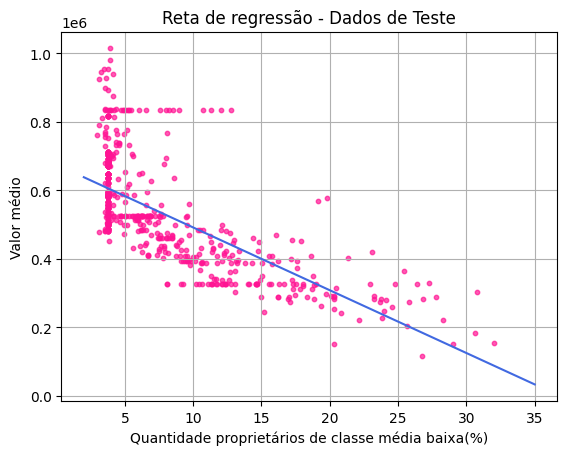

In [70]:
plt.scatter(
    y = y_test, x = x_test, color = 'deeppink',
    s = 10, alpha = 0.7
)
x_plot = np.linspace(2, 35)
plt.plot(
    x_plot,
    x_plot * reg_linear2.coef_ + reg_linear2.intercept_,
    color = 'royalblue'
)
plt.grid(True)
plt.title('Reta de regressão - Dados de Teste')
plt.ylabel('Valor médio')
plt.xlabel('Quantidade proprietários de classe média baixa(%)')

**Previsão para valores distintos**

In [71]:
valor_casa = reg_linear2.predict([[36]])
print('Valor da casa: US$ {:.2f}'.format(float(valor_casa)))

Valor da casa: US$ 14964.48


### Métricas de desempenho ###

**Erro absoluto médio**

In [72]:
mean_absolute_error(y_test, previsoes_test)

86384.4804577022

**Erro quadrático médio**

In [73]:
mean_squared_error(y_test, previsoes_test)

12536931121.175352

**Raiz do erro quadrático médio (RMSE)**

In [74]:
np.sqrt(mean_absolute_error(y_test, previsoes_test))

293.91236867083734

### Cross Validation ###

In [75]:
kfold = KFold(n_splits = 30, shuffle = True, random_state = 5)

In [76]:
modelo = LinearRegression()
resultado = cross_val_score(modelo, x2, y, cv = kfold)
resultado

array([0.5075231 , 0.56011952, 0.39972981, 0.41909918, 0.44942749,
       0.55820736, 0.48893928, 0.35102304, 0.43192779, 0.55744017,
       0.50933908, 0.45696772, 0.5041402 , 0.39400759, 0.46412129,
       0.53765002, 0.60383458, 0.36988027, 0.48961542, 0.49354787,
       0.47103774, 0.33800335, 0.65743342, 0.56567166, 0.55266788,
       0.58104144, 0.41434301, 0.39339792, 0.57862156, 0.45780182])

In [77]:
print("Acurácia média: %.2f%%" % (resultado.mean() * 100.0))

Acurácia média: 48.52%


## Regressão linear simples com statsmodels ##

In [78]:
x2 = df.iloc[:, 1:2].values

In [79]:
y = df.iloc[:, 3].values

### Criando o modelo ###

In [80]:
regressao = smf.ols('y ~ x2', data = df).fit()

### Resíduos  </br>
<span style="font-size: 14px;">
Resíduos são as diferenças entre os valores observados e os valores previstos pelo modelo de regressão.</br> Em outras palavras, os resíduos representam o erro do modelo, ou seja, o quanto as observações reais desviam das previsões feitas pelo modelo.
</span>

<span style="font-size: 14px;">

- **Verificação da Assunção de Homocedasticidade:** </br>Os resíduos devem ter variância constante em relação às variáveis independentes. Um gráfico dos resíduos versus valores ajustados pode ajudar a identificar se essa suposição é atendida. </br></br>
- **Identificação de Observações Atípicas ou Influentes:** </br>Observações com resíduos muito grandes podem indicar pontos de dados atípicos ou influentes que podem estar distorcendo o modelo. </br></br>
- **Avaliação da Adequação do Modelo:** </br>Um padrão nos resíduos pode indicar que o modelo não está capturando adequadamente a relação entre as variáveis independentes e dependentes. Isso pode sugerir a necessidade de considerar modelos alternativos ou adicionar variáveis explicativas ao modelo.
</span>

In [81]:
residuos = regressao.resid
residuos

0       -82600.811295
1       -55173.882960
2       124326.212283
3        76634.060388
4       180147.127387
            ...      
2035    -44599.222625
2036    -95299.222625
2037    -21199.222625
2038    -51199.222625
2039   -127999.222625
Length: 2040, dtype: float64

#### Teste de normalidade dos resíduos ####
<span style="font-size: 14px;">

- **HO** = Distribuição normal: </br> **p-valor > 0.05**
- **HA** = Distribuição NÃO normal: </br> **p-valor <= 0.05**
</span>

##### Shapiro #####

In [82]:
estatistica, p_valor = stats.shapiro(residuos)
print('Estatística de teste: {:.2f}'.format(estatistica))
print('p-valor: {:.2e}'.format(p_valor))

Estatística de teste: 0.93
p-valor: 9.62e-30


##### Stats (probplot) #####
<span style="font-size: 14px;">

- **Eixo x (Quantis teóricos)**: Representa os quantis esperados para a distribuição teórica.
- **Eixo y (Quantis observados)**: Representa os quantis observados nos seus dados.
- **Linha diagonal de referência**: Indica onde os pontos deveriam estar se os dados estivessem distribuídos de acordo com a distribuição teórica.
- **Padrões nos pontos**: Alinhamento com a linha diagonal sugere uma boa adequação à distribuição teórica; desvio indica falta de adequação.
- **Curva em forma de S**: Pode indicar caudas mais pesadas nos dados em relação à distribuição teórica.
- **Pontos extremos**: Pontos nos extremos do gráfico podem indicar valores atípicos ou discrepantes nos dados.

</span>

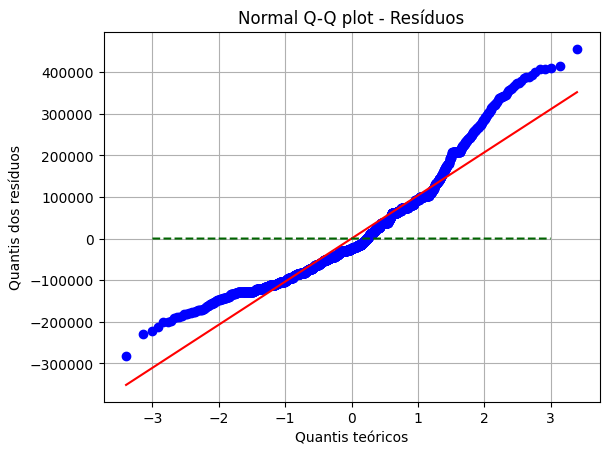

In [83]:
stats.probplot(
    residuos, dist = 'norm', plot = plt
)
plt.plot([-3, 3], [-3, 3], color='darkgreen', linestyle='--')
plt.title("Normal Q-Q plot - Resíduos")
plt.xlabel("Quantis teóricos")
plt.ylabel("Quantis dos resíduos")
plt.grid(True)
plt.show()

##### Homocedasticidade </br>

<span style="font-size: 14px;">

- Homocedasticidade refere-se à constância da variância dos erros em um modelo de regressão ao longo da faixa dos valores da variável independente.
- A presença de homocedasticidade é crucial para garantir a precisão das estimativas de parâmetros e a validade das inferências estatísticas feitas a partir do modelo de regressão.

</span>

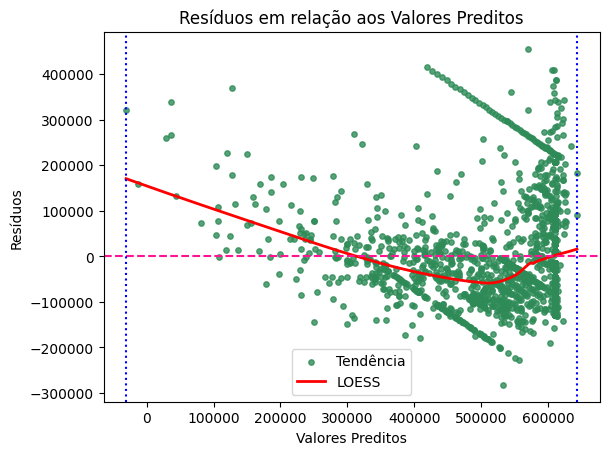

In [84]:
plt.scatter(y=residuos, x=regressao.predict(), color='seagreen', alpha=0.8, s = 15)
sns.regplot(x=regressao.predict(), y=residuos, scatter=False, color='red', lowess=True, line_kws={'lw': 2})
# Linha horizontal em y = 0
plt.axhline(y=0, color='deeppink', linestyle='--', linewidth=1.5)
min_predito = regressao.predict().min()
max_predito = regressao.predict().max()
# Adicionando linhas verticais para o mínimo e o máximo dos valores preditos
plt.axvline(x=min_predito, color='blue', linestyle=':', linewidth=1.5)
plt.axvline(x=max_predito, color='blue', linestyle=':', linewidth=1.5)
plt.title("Resíduos em relação aos Valores Preditos")
plt.xlabel("Valores Preditos")
plt.ylabel("Resíduos")
plt.legend(['Tendência', 'LOESS'])
plt.grid(False)
plt.show()

##### Teste Breusch-Pagan (Homocedasticidade ou heterocedasticidade) #####

<span style="font-size: 14px;">

- **Homocedasticidade:** Refere-se à constância da variância dos erros em relação às variáveis independentes.</br> Se os erros forem homocedásticos, a variância dos erros será constante em toda a faixa dos valores das variáveis independentes. </br>
- **Heterocedasticidade:** Refere-se à variância dos erros que não é constante em relação às variáveis independentes.</br> Isso pode ocorrer quando a variância dos erros aumenta ou diminui à medida que os valores das variáveis independentes aumentam.

**Valores**:
- **HO** = Existe homocedasticidade: p-valor > 0.05
- **HA** = NÃO existe homocedasticidade: p-valor <= 0.05

- **p-valor (p-value)**: Probabilidade de observar um resultado igual ou mais extremo que o observado, assumindo que a hipótese nula seja verdadeira. Indica a significância estatística de um resultado.
- **f-valor (f-value)**: Estatística de teste usada em análises de regressão para testar a significância global do modelo. Compara a variabilidade explicada pelo modelo com a variabilidade não explicada.
- **fp-valor (f p-value)**: O p-valor associado ao f-valor. Indica a probabilidade de obter um f-valor igual ou mais extremo que o observado, sob a hipótese nula de que todos os coeficientes de regressão são zero. Indica a significância global do modelo.

</span>

In [85]:
estatistica, p, f, fp = sms.het_breuschpagan(
    regressao.resid, regressao.model.exog
)
print('Estatística de teste: {:.2f}'.format(estatistica))
print('p-valor: {:.2f}'.format(p))
print('f-valor: {:.2f}'.format(f))
print('f_p-valor: {:.2f}'.format(fp))

Estatística de teste: 0.74
p-valor: 0.39
f-valor: 0.74
f_p-valor: 0.39


#### Outliers nos resíduos ####

In [86]:
outliers = regressao.outlier_test()

In [87]:
outliers.max()

student_resid    4.270342
unadj_p          0.998731
bonf(p)          1.000000
dtype: float64

In [88]:
outliers.min()

student_resid   -2.640066
unadj_p          0.000020
bonf(p)          0.041646
dtype: float64

**Resultado -> Modelo não consistente**

In [89]:
print(regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     1992.
Date:                Thu, 09 May 2024   Prob (F-statistic):          4.59e-304
Time:                        15:29:24   Log-Likelihood:                -26521.
No. Observations:                2040   AIC:                         5.305e+04
Df Residuals:                    2038   BIC:                         5.306e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.798e+05   3956.057    171.830      0.0

In [90]:
coefs = pd.DataFrame(regressao.params)
coefs.columns = ['Coeficientes']
print(coefs)

            Coeficientes
Intercept  679768.624541
x2         -18708.396234


##### Resultado da equação: #####
<span style="font-size: 14px; font-family: monospace;">

$ \text{Valor médio da casa} = 679768.624541 -18708.396234 \times \text{porcentagem de proprietários de classe baixa} $

</span>

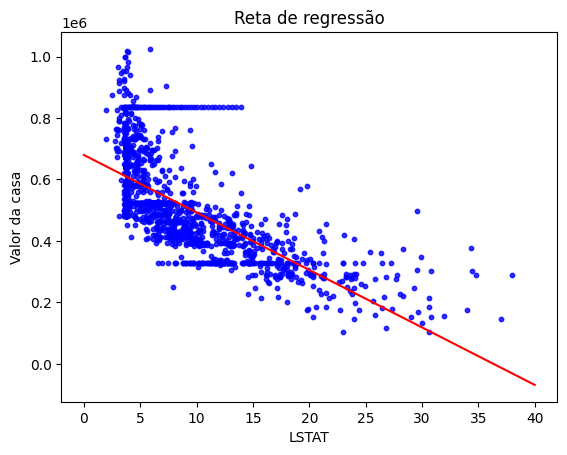

In [96]:
plt.scatter(y = df.MEDV, x = df.LSTAT, color = 'blue', s = 10, alpha = 0.8)
x_plot = np.linspace(0, 40)
plt.plot(x_plot, x_plot * regressao.params[1] + regressao.params[0], color = 'r')
plt.title('Reta de regressão')
plt.ylabel('Valor da casa')
plt.xlabel('LSTAT')
plt.show()